In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
merged_dataset = pd.read_excel("merged_dataset.xlsx")
print("The number of unique cations is:",len(set(merged_dataset["Cation_Name"])))
print("The number of unique anions is:",len(set(merged_dataset["Anion_Name"])))

The number of unique cations is: 958
The number of unique anions is: 272


<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2309415/1443799919.py:20: SyntaxWarning: invalid escape sequence '\e'
  axs[1].axvline(x=visc_req, color='red', linestyle='--', label=f'$\eta_0$ = {visc_req:.3f} $Pa \cdot s$')
/tmp/ipykernel_2309415/1443799919.py:20: SyntaxWarning: invalid escape sequence '\c'
  axs[1].axvline(x=visc_req, color='red', linestyle='--', label=f'$\eta_0$ = {visc_req:.3f} $Pa \cdot s$')
/tmp/ipykernel_2309415/1443799919.py:28: SyntaxWarning: invalid escape sequence '\s'
  axs[2].axvline(x=sten_req, color='red', linestyle='--', lw=2, label=f'$\sigma_0$ = {sten_req} $N/m$')


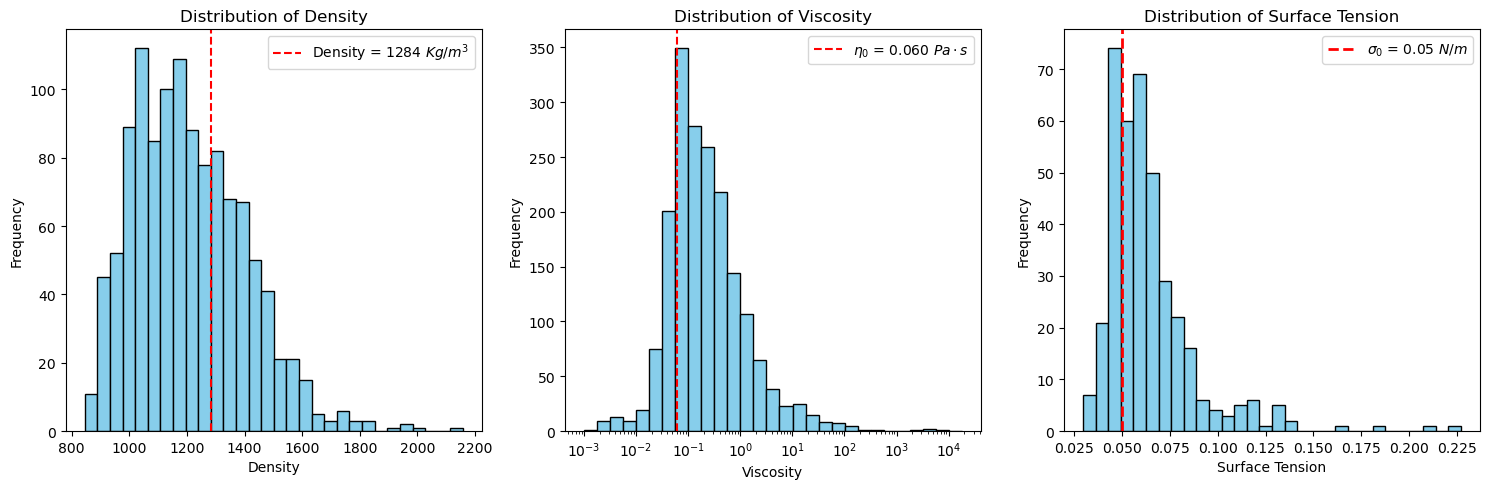

In [3]:
dens_req = 1284    # EMIBF4
visc_req = 0.037223 # EMIBF4
visc_req = 0.060121 # EMIFAP
sten_req = 0.05

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Density Plot
axs[0].hist(merged_dataset["Density"].dropna(), bins=30, color='skyblue', edgecolor='black')
axs[0].axvline(x=dens_req, color='red', linestyle='--', label=f'Density = {dens_req} $Kg/m^3$')
axs[0].set_title('Distribution of Density')
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Viscosity Plot
log_bins = np.logspace(np.log10(0.001), np.log10(18000), 30)
axs[1].hist(merged_dataset["η0"].dropna(), bins=log_bins, color='skyblue', edgecolor='black')
axs[1].set_xscale('log')
axs[1].axvline(x=visc_req, color='red', linestyle='--', label=f'$\eta_0$ = {visc_req:.3f} $Pa \cdot s$')
axs[1].set_title('Distribution of Viscosity')
axs[1].set_xlabel('Viscosity')
axs[1].set_ylabel('Frequency')
axs[1].legend()

# Surface Tension Plot
axs[2].hist(merged_dataset["σ0"].dropna(), bins=30, color='skyblue', edgecolor='black')
axs[2].axvline(x=sten_req, color='red', linestyle='--', lw=2, label=f'$\sigma_0$ = {sten_req} $N/m$')
axs[2].set_title('Distribution of Surface Tension')
axs[2].set_xlabel('Surface Tension')
axs[2].set_ylabel('Frequency')
axs[2].legend()

plt.tight_layout()
plt.show()


In [5]:
condition_accepted = (merged_dataset["Density"] >= dens_req) & (merged_dataset["η0"] <= visc_req) & (merged_dataset["σ0"] >= sten_req)
condition_rejected = (merged_dataset["Density"] < dens_req) | (merged_dataset["η0"] > visc_req) | (merged_dataset["σ0"] < sten_req)
uncertain_mask = ~(condition_accepted | condition_rejected)


accepted= merged_dataset[condition_accepted]
rejected= merged_dataset[condition_rejected]
uncertain = merged_dataset[uncertain_mask]

print("the number of ILs that satisfy all requirements is:", accepted.shape[0])
print("the number of ILs that are rejected is:", rejected.shape[0])
print("The number of ILs that we are uncertain about is:", uncertain.shape[0])
print("---")
print("The ILs that satisfy all requirements are:")
accepted


the number of ILs that satisfy all requirements is: 1782
the number of ILs that are rejected is: 1782
The number of ILs that we are uncertain about is: 465
---
The ILs that satisfy all requirements are:


,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density,η0,σ0
231,"1,3-dimethyl-1H-imidazol-3-ium",bis(trifluoromethylsulfonyl)azanide,Cn1cc[n+](C)c1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,97.138,280.147,1569.049191,0.038385,0.056394
480,1-butyl-1-methylpyrrolidin-1-ium,bis(flurosulfonyl)azanide,CCCC[N+]1(C)CCCC1,FS(=O)(=O)[N-]S(F)(=O)=O,142.261,180.132,1306.878044,0.056272,0.063883
613,1-butyl-3-methyl-1H-imidazol-3-ium,tetrachloroferrate (III),CCCCn1cc[n+](C)c1,Cl[Fe-](Cl)(Cl)Cl,139.218,197.658,1365.676142,0.046000,0.063467
650,1-butyl-4-methylpyridin-1-ium,bis(trifluoromethylsulfonyl)azanide,CCCC[n+]1ccc(C)cc1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,150.240,280.147,1412.146712,0.055959,0.051208
801,1-ethyl-3-methyl-1H-imidazol-3-ium,bis(trifluoromethylsulfonyl)azanide,CCn1cc[n+](C)c1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,111.164,280.147,1518.598257,0.032092,0.053045
847,1-ethyl-3-methyl-1H-imidazol-3-ium,tetrachloroaluminate,CCn1cc[n+](C)c1,Cl[Al-](Cl)(Cl)Cl,111.164,168.794,1295.215487,0.017910,0.073243
849,1-ethyl-3-methyl-1H-imidazol-3-ium,tetrachlorogallate,CCn1cc[n+](C)c1,Cl[Ga-](Cl)(Cl)Cl,111.164,211.536,1474.900509,0.013000,0.086757
852,1-ethyl-3-methyl-1H-imidazol-3-ium,tetrafluoroborate,CCn1cc[n+](C)c1,F[B-](F)(F)F,111.164,86.805,1284.238568,0.037222,0.064249
864,1-ethyl-3-methyl-1H-imidazol-3-ium,trifluoroacetate,CCn1cc[n+](C)c1,[O-]C(=O)C(F)(F)F,111.164,113.016,1291.499820,0.031351,0.067669
865,1-ethyl-3-methyl-1H-imidazol-3-ium,trifluoromethanesulfonate,CCn1cc[n+](C)c1,[O-]S(=O)(=O)C(F)(F)F,111.164,149.070,1384.276236,0.040498,0.056471


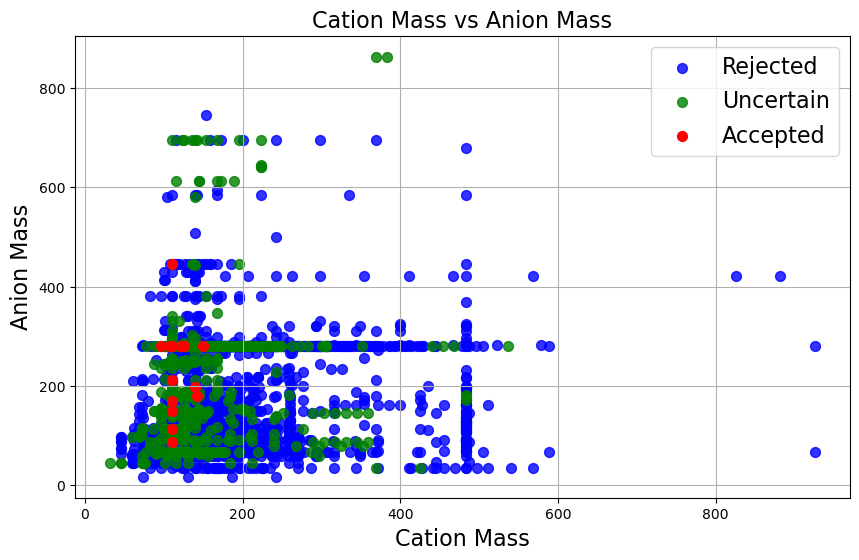

In [6]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

plt.scatter(rejected["Cation_Mass"], rejected["Anion_Mass"],marker='o', s=50, color="blue",alpha=0.8,label="Rejected")
plt.scatter(uncertain["Cation_Mass"], uncertain["Anion_Mass"],marker='o', s=50, color="green",alpha=0.8,label="Uncertain")
plt.scatter(accepted["Cation_Mass"], accepted["Anion_Mass"],marker='o', s=50,color="red",alpha=1,label="Accepted") 

plt.title('Cation Mass vs Anion Mass',fontsize=16)  # Title of the plot
plt.xlabel('Cation Mass',fontsize=16)  # X-axis label
plt.ylabel('Anion Mass',fontsize=16)  # Y-axis label
plt.grid(True)  # Show grid lines (optional)
plt.legend(fontsize=16)

plt.show()  # Display the plot

____

## Molecular Descriptors


In [7]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem

import mordred
from mordred import Calculator, descriptors


Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [8]:
cat_accept = accepted[["Cation_Name", "Cation_SMILES", "Cation_Mass"]].copy()
an_accept = accepted[["Anion_Name", "Anion_SMILES", "Anion_Mass"]].copy()

cat_reject = rejected[["Cation_Name", "Cation_SMILES", "Cation_Mass"]].copy()
an_reject = rejected[["Anion_Name", "Anion_SMILES", "Anion_Mass"]].copy()

In [9]:
mol_cat_list = []
for smile in cat_accept["Cation_SMILES"]:
  mol = Chem.MolFromSmiles(smile) #Convert SMILES to molecules (without Hydrogen)
  mol = Chem.AddHs(mol) # Add Hudrogen
  mol_cat_list.append(mol)
mol_cat_list

# Create a DataFrame from mol_cat_list with the same index as cat_accept
mol_df_cat = pd.DataFrame(mol_cat_list, columns=['Mol'], index=cat_accept.index)
# Concatenate cat_accept with mol_df
cat_accept= pd.concat([cat_accept, mol_df_cat], axis=1)
cat_accept

,Cation_Name,Cation_SMILES,Cation_Mass,Mol
231,"1,3-dimethyl-1H-imidazol-3-ium",Cn1cc[n+](C)c1,97.138,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccd930>
480,1-butyl-1-methylpyrrolidin-1-ium,CCCC[N+]1(C)CCCC1,142.261,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccd9a0>
613,1-butyl-3-methyl-1H-imidazol-3-ium,CCCCn1cc[n+](C)c1,139.218,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccda10>
650,1-butyl-4-methylpyridin-1-ium,CCCC[n+]1ccc(C)cc1,150.240,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccda80>
801,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccdaf0>
847,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccdb60>
849,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccdbd0>
852,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccdc40>
864,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccdcb0>
865,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccdd20>


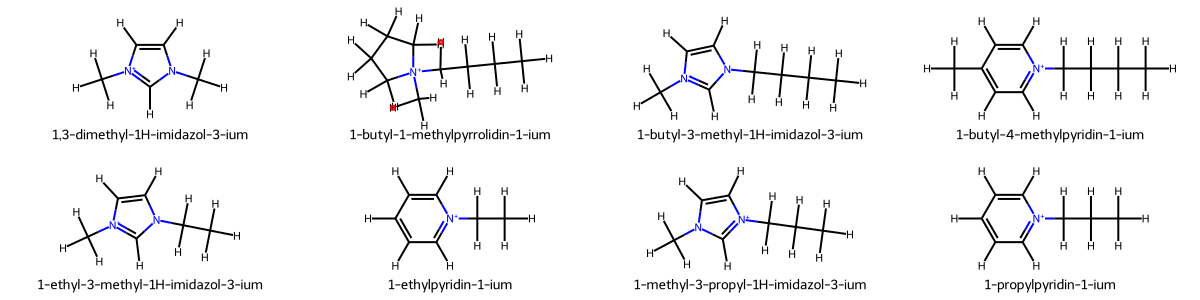

In [10]:
unique_cations=cat_accept.drop_duplicates(subset=['Cation_Name'])
Draw.MolsToGridImage(unique_cations['Mol'],molsPerRow=4,subImgSize=(300,150),legends=[x for x in unique_cations['Cation_Name']])


In [11]:
an_accept

,Anion_Name,Anion_SMILES,Anion_Mass
231,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147
480,bis(flurosulfonyl)azanide,FS(=O)(=O)[N-]S(F)(=O)=O,180.132
613,tetrachloroferrate (III),Cl[Fe-](Cl)(Cl)Cl,197.658
650,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147
801,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147
847,tetrachloroaluminate,Cl[Al-](Cl)(Cl)Cl,168.794
849,tetrachlorogallate,Cl[Ga-](Cl)(Cl)Cl,211.536
852,tetrafluoroborate,F[B-](F)(F)F,86.805
864,trifluoroacetate,[O-]C(=O)C(F)(F)F,113.016
865,trifluoromethanesulfonate,[O-]S(=O)(=O)C(F)(F)F,149.070


In [12]:
mol_an_list = []

for smile in an_accept["Anion_SMILES"]:
  mol = Chem.MolFromSmiles(smile) #Convert SMILES to molecules (without Hydrogen)
  mol = Chem.AddHs(mol) # Add Hudrogen
  mol_an_list.append(mol)
mol_an_list

# Create a DataFrame from mol_cat_list with the same index as cat_accept
mol_df_an = pd.DataFrame(mol_an_list, columns=['Mol'], index=cat_accept.index)
# Concatenate cat_accept with mol_df
an_accept= pd.concat([an_accept, mol_df_an], axis=1)


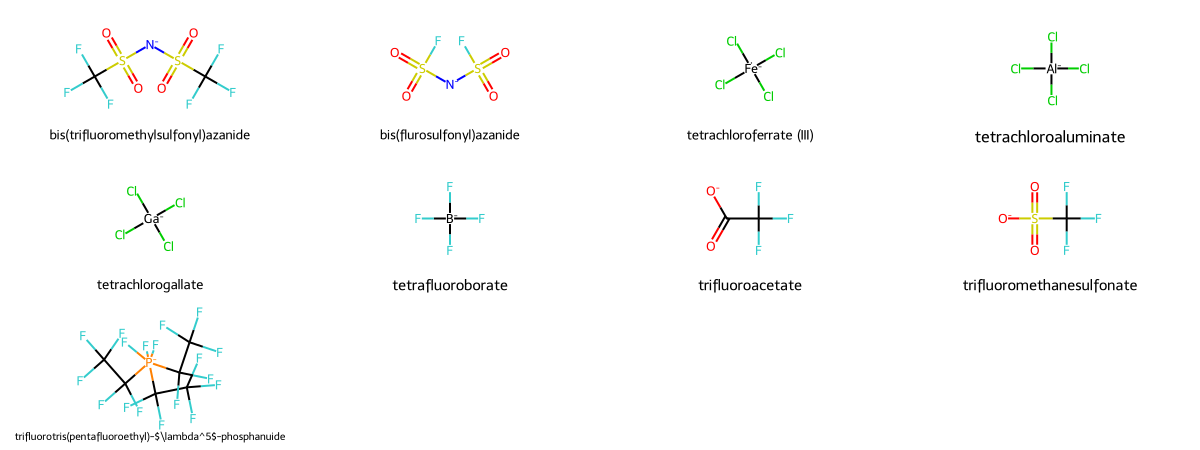

In [13]:
unique_anions=an_accept.drop_duplicates(subset=['Anion_Name'])
Draw.MolsToGridImage(unique_anions['Mol'],molsPerRow=4,subImgSize=(300,150),legends=[x for x in unique_anions['Anion_Name']])

#### Create calculator object to calculate 2D descriptors



In [14]:
# Creating a descriptor calculator with all descriptors
calc2d = Calculator(descriptors, ignore_3D=True)

In [15]:
# calc.descriptors contains all the descriptor classes
print(calc2d.descriptors[:5])

(mordred.ABCIndex.ABCIndex(), mordred.ABCIndex.ABCGGIndex(), mordred.AcidBase.AcidicGroupCount(), mordred.AcidBase.BasicGroupCount(), mordred.AdjacencyMatrix.AdjacencyMatrix('SpAbs'))


In [16]:
# print the names of descriptors
all_descriptor_names = [desc.__class__.__name__ for desc in calc2d.descriptors]
print(all_descriptor_names[:20])

['ABCIndex', 'ABCGGIndex', 'AcidicGroupCount', 'BasicGroupCount', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AromaticAtomsCount', 'AromaticBondsCount', 'AtomCount', 'AtomCount']


In [17]:
# Checking the length of descriptors in the calculator
len(all_descriptor_names)

1613

In [18]:
# Calculating descriptors for a single molecule
ac = mordred.Autocorrelation.ATS(2, 'Z')
ac(cat_accept['Mol'].iloc[2])



625.0

#### Calculate all the descriptors for a dataframe



In [19]:
descriptors_cat = calc2d.pandas(cat_accept['Mol'])
descriptors_an = calc2d.pandas(an_accept['Mol'])

100%|██████████| 14/14 [00:00<00:00, 67.27it/s]


In [20]:
descriptors_cat

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
231,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,8.318418,2.198691,4.110920,8.318418,1.188345,2.861501,...,8.206584,47.382536,97.076025,6.067252,41,4,32.0,34.0,2.972222,1.583333
480,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,12.349859,2.306090,4.483692,12.349859,1.234986,3.201531,...,8.849514,52.733735,142.159026,4.738634,124,9,46.0,50.0,3.812500,2.375000
613,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,12.426800,2.236324,4.251712,12.426800,1.242680,3.191982,...,8.497195,51.903908,139.122975,5.564919,132,8,44.0,47.0,3.722222,2.416667
650,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,13.725227,2.205946,4.411892,13.725227,1.247748,3.278326,...,8.696677,40.025593,150.127726,5.560286,174,11,48.0,51.0,3.972222,2.666667
801,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
847,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
849,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
852,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
864,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
865,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667


In [21]:
descriptors_an.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
231,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5000,2.875
480,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.936238,2.236068,4.472136,7.936238,0.881804,3.058355,...,8.815370,37.856472,179.924229,19.991581,88,6,42.0,40.0,6.3750,1.750
613,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,195.810897,39.162179,16,0,20.0,16.0,4.0625,1.000
650,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5000,2.875
801,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5000,2.875


In [22]:
descriptors_an

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
231,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
480,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.936238,2.236068,4.472136,7.936238,0.881804,3.058355,...,8.815370,37.856472,179.924229,19.991581,88,6,42.0,40.0,6.375000,1.7500
613,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,195.810897,39.162179,16,0,20.0,16.0,4.062500,1.0000
650,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
801,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
847,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,166.857498,33.371500,16,0,20.0,16.0,4.062500,1.0000
849,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,208.801533,41.760307,16,0,20.0,16.0,4.062500,1.0000
852,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,87.003467,17.400693,16,0,20.0,16.0,4.062500,1.0000
864,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,6.602720,2.175328,4.350655,6.602720,0.943246,2.792781,...,8.466531,34.219913,112.985587,16.140798,42,6,30.0,30.0,5.173611,1.5000
865,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.211103,2.302776,4.605551,7.211103,0.901388,2.947233,...,9.037771,36.999431,148.952573,18.619072,58,9,38.0,40.0,6.125000,1.5625


## Physical descriptors 3D

In [23]:
# Creating a descriptor calculator with all descriptors
calc3d = Calculator(descriptors, ignore_3D=False)

In [24]:
# calc.descriptors contains all the descriptor classes
print(calc3d.descriptors[:5])

(mordred.ABCIndex.ABCIndex(), mordred.ABCIndex.ABCGGIndex(), mordred.AcidBase.AcidicGroupCount(), mordred.AcidBase.BasicGroupCount(), mordred.AdjacencyMatrix.AdjacencyMatrix('SpAbs'))


In [25]:
# print the names of descriptors
all_descriptor_names = [desc.__class__.__name__ for desc in calc3d.descriptors]
print(all_descriptor_names[:20])

['ABCIndex', 'ABCGGIndex', 'AcidicGroupCount', 'BasicGroupCount', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AromaticAtomsCount', 'AromaticBondsCount', 'AtomCount', 'AtomCount']


In [26]:
len(all_descriptor_names)

1826

In [27]:
# Function to generate 3D coordinates using RDKit
def generate_3d_coordinates(molecule):
    AllChem.EmbedMolecule(molecule)
    AllChem.MMFFOptimizeMolecule(molecule)

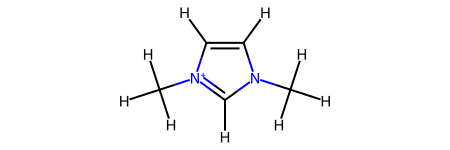

In [28]:
cat_accept['Mol'].iloc[0]

In [29]:
generate_3d_coordinates(cat_accept['Mol'].iloc[0])

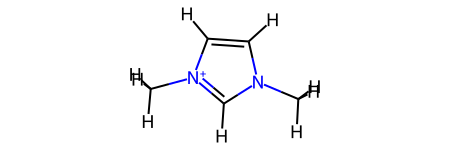

In [30]:
cat_accept['Mol'].iloc[0]

In [31]:
# Iterate through molecules
dcat_accept = []
for mol in tqdm(cat_accept['Mol']):
  generate_3d_coordinates(mol)

 # Calculate descriptors
  result = calc3d(mol)
  dcat_accept.append(result)


100%|██████████| 14/14 [00:00<00:00, 23.54it/s]


In [32]:
df_from_dcat_accept = pd.DataFrame(dcat_accept, columns = (str(key) for key in result.keys()),index=cat_accept.index)
cat3d_accept = pd.concat([cat_accept[['Cation_Name', 'Cation_SMILES', 'Cation_Mass']], df_from_dcat_accept], axis=1)
cat3d_accept


,Cation_Name,Cation_SMILES,Cation_Mass,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
231,"1,3-dimethyl-1H-imidazol-3-ium",Cn1cc[n+](C)c1,97.138,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,8.318418,2.198691,4.110920,...,8.206584,47.382536,97.076025,6.067252,41,4,32.0,34.0,2.972222,1.583333
480,1-butyl-1-methylpyrrolidin-1-ium,CCCC[N+]1(C)CCCC1,142.261,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,12.349859,2.306090,4.483692,...,8.849514,52.733735,142.159026,4.738634,124,9,46.0,50.0,3.812500,2.375000
613,1-butyl-3-methyl-1H-imidazol-3-ium,CCCCn1cc[n+](C)c1,139.218,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,12.426800,2.236324,4.251712,...,8.497195,51.903908,139.122975,5.564919,132,8,44.0,47.0,3.722222,2.416667
650,1-butyl-4-methylpyridin-1-ium,CCCC[n+]1ccc(C)cc1,150.240,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,13.725227,2.205946,4.411892,...,8.696677,40.025593,150.127726,5.560286,174,11,48.0,51.0,3.972222,2.666667
801,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
847,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
849,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
852,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
864,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
865,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667


In [33]:
# Iterate through molecules
dan_accept = []
for mol in tqdm(an_accept['Mol']):
  generate_3d_coordinates(mol)

 # Calculate descriptors
  result = calc3d(mol)
  dan_accept.append(result)

 64%|██████▍   | 9/14 [00:00<00:00, 29.27it/s][22:30:30] UFFTYPER: Warning: hybridization set to SP3 for atom 7
[22:30:30] UFFTYPER: Unrecognized charge state for atom: 7
100%|██████████| 14/14 [00:00<00:00, 25.33it/s]


In [34]:
df_from_dan_accept = pd.DataFrame(dan_accept, columns = (str(key) for key in result.keys()),index=an_accept.index)
an3d_accept = pd.concat([an_accept[['Anion_Name', 'Anion_SMILES', 'Anion_Mass']], df_from_dan_accept], axis=1)
an3d_accept

,Anion_Name,Anion_SMILES,Anion_Mass,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
231,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
480,bis(flurosulfonyl)azanide,FS(=O)(=O)[N-]S(F)(=O)=O,180.132,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.936238,2.236068,4.472136,...,8.815370,37.856472,179.924229,19.991581,88,6,42.0,40.0,6.375000,1.7500
613,tetrachloroferrate (III),Cl[Fe-](Cl)(Cl)Cl,197.658,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,...,7.625107,29.418928,195.810897,39.162179,16,0,20.0,16.0,4.062500,1.0000
650,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
801,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
847,tetrachloroaluminate,Cl[Al-](Cl)(Cl)Cl,168.794,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,...,7.625107,29.418928,166.857498,33.371500,16,0,20.0,16.0,4.062500,1.0000
849,tetrachlorogallate,Cl[Ga-](Cl)(Cl)Cl,211.536,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,...,7.625107,29.418928,208.801533,41.760307,16,0,20.0,16.0,4.062500,1.0000
852,tetrafluoroborate,F[B-](F)(F)F,86.805,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,...,7.625107,29.418928,87.003467,17.400693,16,0,20.0,16.0,4.062500,1.0000
864,trifluoroacetate,[O-]C(=O)C(F)(F)F,113.016,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,6.602720,2.175328,4.350655,...,8.466531,34.219913,112.985587,16.140798,42,6,30.0,30.0,5.173611,1.5000
865,trifluoromethanesulfonate,[O-]S(=O)(=O)C(F)(F)F,149.070,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.211103,2.302776,4.605551,...,9.037771,36.999431,148.952573,18.619072,58,9,38.0,40.0,6.125000,1.5625


## Build input dataframe


In [35]:
cat_accept
an_accept
cat_reject
an_reject ;

In [42]:
positions_to_remove=[]
for i in range(len(an_reject["Anion_SMILES"])):
    try:
        mol = Chem.MolFromSmiles(an_reject["Anion_SMILES"].iloc[i])
    except Exception as e:
        # This block is executed if an error occurs in the try block
        print(f"Failed to convert SMILES at index {i}")
        positions_to_remove.append(i)
    

In [43]:
indices_to_remove = [an_reject["Anion_SMILES"].index[pos] for pos in positions_to_remove]
indices_to_remove
cat_reject = cat_reject.drop(indices_to_remove)
an_reject = an_reject.drop(indices_to_remove)




In [44]:
mol_cat_list = []
for smile in cat_reject["Cation_SMILES"]:
  mol = Chem.MolFromSmiles(smile) #Convert SMILES to molecules (without Hydrogen)
  mol = Chem.AddHs(mol) # Add Hudrogen
  mol_cat_list.append(mol)
mol_cat_list

# Create a DataFrame from mol_cat_list with the same index as cat_accept
mol_df_cat = pd.DataFrame(mol_cat_list, columns=['Mol'], index=cat_reject.index)
# Concatenate cat_accept with mol_df
cat_reject= pd.concat([cat_reject, mol_df_cat], axis=1)
cat_reject

,Cation_Name,Cation_SMILES,Cation_Mass,Mol
0,1-methyl-1-(2-methylpropyl)pyrrolidin-1-ium,CC(C)C[N+]1(C)CCCC1,142.261,<rdkit.Chem.rdchem.Mol object at 0x7f9578f16110>
1,4-(dimethylamino)-1-[(octyloxy)methyl]pyridin...,CCCCCCCCOC[n+]1ccc(cc1)N(C)C,265.420,<rdkit.Chem.rdchem.Mol object at 0x7f9578f16a40>
6,"(2,3-dihydroxypropyl)trioctylphosphanium",CCCCCCCC[P+](CCCCCCCC)(CCCCCCCC)C[C@H](O)CO,445.721,<rdkit.Chem.rdchem.Mol object at 0x7f9578f16ab0>
7,"(2,3-dihydroxypropyl)trioctylphosphanium",CCCCCCCC[P+](CCCCCCCC)(CCCCCCCC)C[C@H](O)CO,445.721,<rdkit.Chem.rdchem.Mol object at 0x7f9578f16b20>
8,"(2,3-dihydroxypropyl)trioctylphosphanium",CCCCCCCC[P+](CCCCCCCC)(CCCCCCCC)C[C@H](O)CO,445.721,<rdkit.Chem.rdchem.Mol object at 0x7f9578f16b90>
...,...,...,...,...
2253,tris[butyl(methyl)amino]cycloprop-2-en-1-ylium,CCCCN(C)c1c(N(C)CCCC)[c+]1N(C)CCCC,294.506,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc78b0>
2254,tris[butyl(methyl)amino]cycloprop-2-en-1-ylium,CCCCN(C)c1c(N(C)CCCC)[c+]1N(C)CCCC,294.506,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7920>
2258,{[butyl(ethyl)amino](dimethylamino)methylidene...,CCCCN(CC)C(N(C)C)=[N+](C)C,200.344,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7990>
2259,{[butyl(methyl)amino](dimethylamino)methyliden...,CCCCN(C)C(N(C)C)=[N+](C)C,186.318,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7a00>


In [45]:
mol_an_list = []
for smile in an_reject["Anion_SMILES"]:
  mol = Chem.MolFromSmiles(smile) #Convert SMILES to molecules (without Hydrogen)
  mol = Chem.AddHs(mol) # Add Hudrogen
  mol_an_list.append(mol)
mol_an_list

# Create a DataFrame from mol_cat_list with the same index as cat_accept
mol_df_an = pd.DataFrame(mol_an_list, columns=['Mol'], index=an_reject.index)
# Concatenate cat_accept with mol_df
an_reject= pd.concat([an_reject, mol_df_an], axis=1)
an_reject

,Anion_Name,Anion_SMILES,Anion_Mass,Mol
0,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7c30>
1,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7bc0>
6,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7d10>
7,chloride,[Cl-],35.454,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7ca0>
8,hexafluorophosphate,F[P-](F)(F)(F)(F)F,144.965,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7df0>
...,...,...,...,...
2253,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9578e18ac0>
2254,dicyanoazanide,N#C[N-]C#N,66.042,<rdkit.Chem.rdchem.Mol object at 0x7f9578e18b30>
2258,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9578e18ba0>
2259,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9578e18c10>


In [46]:
position = cat_accept.columns.get_loc("Cation_SMILES") + 1
cat_accept.insert(position, "Accepted", 1)
cat_reject.insert(position, "Accepted", -1)
position = an_accept.columns.get_loc("Anion_SMILES") + 1
an_accept.insert(position, "Accepted", 1)
an_reject.insert(position, "Accepted", -1)

In [47]:
cat_input=pd.concat([cat_accept, cat_reject], axis=0).reset_index(drop=True)
an_input=pd.concat([an_accept, an_reject], axis=0).reset_index(drop=True)

In [48]:
cat_input

,Cation_Name,Cation_SMILES,Accepted,Cation_Mass,Mol
0,"1,3-dimethyl-1H-imidazol-3-ium",Cn1cc[n+](C)c1,1,97.138,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccd930>
1,1-butyl-1-methylpyrrolidin-1-ium,CCCC[N+]1(C)CCCC1,1,142.261,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccd9a0>
2,1-butyl-3-methyl-1H-imidazol-3-ium,CCCCn1cc[n+](C)c1,1,139.218,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccda10>
3,1-butyl-4-methylpyridin-1-ium,CCCC[n+]1ccc(C)cc1,1,150.240,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccda80>
4,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,1,111.164,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccdaf0>
...,...,...,...,...,...
1789,tris[butyl(methyl)amino]cycloprop-2-en-1-ylium,CCCCN(C)c1c(N(C)CCCC)[c+]1N(C)CCCC,-1,294.506,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc78b0>
1790,tris[butyl(methyl)amino]cycloprop-2-en-1-ylium,CCCCN(C)c1c(N(C)CCCC)[c+]1N(C)CCCC,-1,294.506,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7920>
1791,{[butyl(ethyl)amino](dimethylamino)methylidene...,CCCCN(CC)C(N(C)C)=[N+](C)C,-1,200.344,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7990>
1792,{[butyl(methyl)amino](dimethylamino)methyliden...,CCCCN(C)C(N(C)C)=[N+](C)C,-1,186.318,<rdkit.Chem.rdchem.Mol object at 0x7f9578fc7a00>


In [49]:
an_input

,Anion_Name,Anion_SMILES,Accepted,Anion_Mass,Mol
0,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccdfc0>
1,bis(flurosulfonyl)azanide,FS(=O)(=O)[N-]S(F)(=O)=O,1,180.132,<rdkit.Chem.rdchem.Mol object at 0x7f9580ccd850>
2,tetrachloroferrate (III),Cl[Fe-](Cl)(Cl)Cl,1,197.658,<rdkit.Chem.rdchem.Mol object at 0x7f9580cce180>
3,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9580cce110>
4,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9580cce260>
...,...,...,...,...,...
1789,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9578e18ac0>
1790,dicyanoazanide,N#C[N-]C#N,-1,66.042,<rdkit.Chem.rdchem.Mol object at 0x7f9578e18b30>
1791,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9578e18ba0>
1792,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,<rdkit.Chem.rdchem.Mol object at 0x7f9578e18c10>


In [50]:
failed_indices_cat = []  # List to store indices of failed rows
dcat_all = []

# Iterate over both index and value
for i, mol in tqdm(cat_input['Mol'].items()):
    try:
        generate_3d_coordinates(mol)
        result = calc3d(mol)
        dcat_all.append(result)
    except Exception as e:
        print(f"Failed at index {i}")
        failed_indices_cat.append(i)  # Save the actual index


15it [00:00, 22.97it/s][22:32:24] UFFTYPER: Unrecognized charge state for atom: 8
[22:32:24] UFFTYPER: Unrecognized charge state for atom: 8
18it [00:01,  9.46it/s][22:32:24] UFFTYPER: Unrecognized charge state for atom: 8
[22:32:25] UFFTYPER: Unrecognized charge state for atom: 8
20it [00:01,  6.56it/s][22:32:25] UFFTYPER: Unrecognized charge state for atom: 8
25it [00:02,  8.03it/s][22:32:26] UFFTYPER: Unrecognized charge state for atom: 6
74it [00:04, 25.05it/s][22:32:28] UFFTYPER: Unrecognized charge state for atom: 4
[22:32:28] UFFTYPER: Unrecognized charge state for atom: 4
77it [00:04, 16.38it/s][22:32:28] UFFTYPER: Unrecognized charge state for atom: 4
[22:32:28] UFFTYPER: Unrecognized charge state for atom: 4
[22:32:28] UFFTYPER: Unrecognized charge state for atom: 4
80it [00:05, 13.77it/s][22:32:28] UFFTYPER: Unrecognized charge state for atom: 4
[22:32:28] UFFTYPER: Unrecognized charge state for atom: 4
82it [00:05, 12.60it/s][22:32:28] UFFTYPER: Unrecognized charge state fo

Failed at index 1317


1330it [01:29, 13.59it/s][22:33:52] UFFTYPER: Unrecognized charge state for atom: 2
1381it [01:31, 18.47it/s][22:33:55] UFFTYPER: Unrecognized charge state for atom: 4
1384it [01:32, 18.90it/s][22:33:55] UFFTYPER: Unrecognized charge state for atom: 4
[22:33:55] UFFTYPER: Unrecognized charge state for atom: 4
[22:33:55] UFFTYPER: Unrecognized charge state for atom: 4
1387it [01:32, 18.46it/s][22:33:55] UFFTYPER: Unrecognized charge state for atom: 4
[22:33:55] UFFTYPER: Unrecognized charge state for atom: 6
1389it [01:32, 15.07it/s][22:33:55] UFFTYPER: Unrecognized charge state for atom: 8


Failed at index 1390


1396it [01:33, 10.89it/s][22:33:56] UFFTYPER: Unrecognized charge state for atom: 10
1398it [01:33, 10.53it/s][22:33:56] UFFTYPER: Unrecognized charge state for atom: 10
1400it [01:33,  8.93it/s][22:33:57] UFFTYPER: Unrecognized charge state for atom: 10
1405it [01:33, 13.17it/s]

Failed at index 1400


1421it [01:34, 18.62it/s][22:33:58] UFFTYPER: Unrecognized charge state for atom: 5
[22:33:58] UFFTYPER: Unrecognized charge state for atom: 1
1433it [01:35, 13.01it/s][22:33:59] UFFTYPER: Unrecognized charge state for atom: 12
[22:33:59] UFFTYPER: Unrecognized charge state for atom: 12
1435it [01:35, 11.46it/s][22:33:59] UFFTYPER: Unrecognized charge state for atom: 12
1437it [01:36,  9.01it/s][22:33:59] UFFTYPER: Unrecognized charge state for atom: 12
1444it [01:36, 16.37it/s]

Failed at index 1437
Failed at index 1438


1466it [01:37, 14.49it/s][22:34:01] UFFTYPER: Unrecognized charge state for atom: 6
1468it [01:38, 10.91it/s][22:34:01] UFFTYPER: Unrecognized charge state for atom: 7
1470it [01:38,  9.79it/s][22:34:01] UFFTYPER: Unrecognized charge state for atom: 16
/home/arb399/.conda/envs/my-rdkit-env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
1472it [01:38,  7.33it/s][22:34:02] UFFTYPER: Unrecognized charge state for atom: 6
1473it [01:38,  7.42it/s]

Failed at index 1471


[22:34:02] UFFTYPER: Unrecognized charge state for atom: 6
1476it [01:39,  8.02it/s][22:34:02] UFFTYPER: Unrecognized charge state for atom: 6
1478it [01:39,  9.54it/s][22:34:02] UFFTYPER: Unrecognized charge state for atom: 6
[22:34:02] UFFTYPER: Unrecognized charge state for atom: 6
1487it [01:40,  5.57it/s][22:34:04] UFFTYPER: Unrecognized charge state for atom: 8
1488it [01:41,  5.38it/s][22:34:04] UFFTYPER: Unrecognized charge state for atom: 1
1489it [01:41,  6.00it/s][22:34:04] UFFTYPER: Unrecognized charge state for atom: 1
1490it [01:41,  6.62it/s][22:34:04] UFFTYPER: Unrecognized charge state for atom: 1
1491it [01:41,  7.13it/s][22:34:04] UFFTYPER: Unrecognized charge state for atom: 2
1493it [01:41,  9.61it/s][22:34:05] UFFTYPER: Unrecognized charge state for atom: 9
1500it [01:41, 20.04it/s]

Failed at index 1493


1515it [01:42, 20.28it/s]

Failed at index 1513


1522it [01:43, 14.30it/s]

Failed at index 1520


1524it [01:43, 12.54it/s][22:34:06] UFFTYPER: Unrecognized charge state for atom: 4
1526it [01:43, 11.64it/s][22:34:07] UFFTYPER: Unrecognized charge state for atom: 4
[22:34:07] UFFTYPER: Unrecognized charge state for atom: 4
1528it [01:43, 11.00it/s][22:34:07] UFFTYPER: Unrecognized charge state for atom: 4
[22:34:07] UFFTYPER: Unrecognized charge state for atom: 4
1530it [01:43, 10.57it/s][22:34:07] UFFTYPER: Unrecognized charge state for atom: 4
[22:34:07] UFFTYPER: Unrecognized charge state for atom: 4
1532it [01:44, 10.37it/s][22:34:07] UFFTYPER: Unrecognized charge state for atom: 4
[22:34:07] UFFTYPER: Unrecognized charge state for atom: 4
1534it [01:44, 10.09it/s][22:34:07] UFFTYPER: Unrecognized charge state for atom: 4
[22:34:07] UFFTYPER: Unrecognized charge state for atom: 4
1536it [01:44,  9.92it/s][22:34:08] UFFTYPER: Unrecognized charge state for atom: 4
[22:34:08] UFFTYPER: Unrecognized charge state for atom: 4
1538it [01:44,  9.82it/s][22:34:08] UFFTYPER: Unrecognized

Failed at index 1558


1560it [01:47, 12.56it/s][22:34:10] UFFTYPER: Unrecognized charge state for atom: 6


Failed at index 1560
Failed at index 1561
Failed at index 1562
Failed at index 1563


1569it [01:47, 18.10it/s][22:34:11] UFFTYPER: Unrecognized charge state for atom: 8
[22:34:11] UFFTYPER: Unrecognized charge state for atom: 8
1572it [01:47, 19.02it/s]

Failed at index 1568
Failed at index 1569
Failed at index 1570
Failed at index 1571
Failed at index 1572


[22:34:11] UFFTYPER: Unrecognized charge state for atom: 8
[22:34:11] UFFTYPER: Unrecognized charge state for atom: 8
[22:34:11] UFFTYPER: Unrecognized charge state for atom: 8
1575it [01:48, 19.75it/s]

Failed at index 1573
Failed at index 1574


1581it [01:48, 14.08it/s]

Failed at index 1578


1585it [01:49, 11.45it/s][22:34:12] UFFTYPER: Unrecognized charge state for atom: 4
[22:34:12] UFFTYPER: Unrecognized charge state for atom: 10
1587it [01:49, 10.25it/s][22:34:12] UFFTYPER: Unrecognized charge state for atom: 12
[22:34:13] UFFTYPER: Unrecognized charge state for atom: 12
1589it [01:49,  8.22it/s][22:34:13] UFFTYPER: Unrecognized charge state for atom: 12
1590it [01:49,  7.52it/s][22:34:13] UFFTYPER: Unrecognized charge state for atom: 12
1591it [01:50,  6.95it/s][22:34:13] UFFTYPER: Unrecognized charge state for atom: 12
1592it [01:50,  6.59it/s][22:34:13] UFFTYPER: Unrecognized charge state for atom: 12
1593it [01:50,  6.28it/s][22:34:13] UFFTYPER: Unrecognized charge state for atom: 4
1596it [01:50,  7.33it/s][22:34:14] UFFTYPER: Unrecognized charge state for atom: 4
1604it [01:51, 11.07it/s][22:34:15] UFFTYPER: Unrecognized charge state for atom: 4
1606it [01:51, 11.51it/s][22:34:15] UFFTYPER: Unrecognized charge state for atom: 4
[22:34:15] UFFTYPER: Unrecognized c

Failed at index 1757


1759it [02:20, 11.34it/s][22:34:44] UFFTYPER: Unrecognized charge state for atom: 8
[22:34:44] UFFTYPER: Unrecognized charge state for atom: 8
1761it [02:21,  7.61it/s][22:34:44] UFFTYPER: Unrecognized charge state for atom: 14
[22:34:44] UFFTYPER: Unrecognized charge state for atom: 14
1763it [02:21,  8.70it/s][22:34:45] UFFTYPER: Unrecognized charge state for atom: 8
[22:34:45] UFFTYPER: Unrecognized charge state for atom: 35


Failed at index 1761
Failed at index 1762


1765it [02:22,  3.49it/s][22:34:46] UFFTYPER: Unrecognized charge state for atom: 8
1766it [02:23,  3.56it/s][22:34:46] UFFTYPER: Unrecognized charge state for atom: 8
[22:34:46] UFFTYPER: Unrecognized charge state for atom: 31
1768it [02:23,  4.01it/s]

Failed at index 1766


1783it [02:25,  8.99it/s]

Failed at index 1781
Failed at index 1782
Failed at index 1783
Failed at index 1784


1788it [02:25,  7.23it/s]

Failed at index 1787


1790it [02:26,  6.26it/s]

Failed at index 1788


1794it [02:26, 12.22it/s]


In [51]:
len(failed_indices_cat)

32

In [52]:
len(dcat_all)

1762

In [53]:
cat_input.count()

Cation_Name      1794
Cation_SMILES    1794
Accepted         1794
Cation_Mass      1794
Mol              1794
dtype: int64

In [54]:
cat_input = cat_input.drop(failed_indices_cat)


In [55]:
cat_input.count()

Cation_Name      1762
Cation_SMILES    1762
Accepted         1762
Cation_Mass      1762
Mol              1762
dtype: int64

In [56]:
df_from_dcat_all = pd.DataFrame(dcat_all, columns = (str(key) for key in result.keys()),index=cat_input.index)
cat3d_input = pd.concat([cat_input[['Cation_Name', 'Cation_SMILES', 'Accepted','Cation_Mass']], df_from_dcat_all], axis=1)
cat3d_input


,Cation_Name,Cation_SMILES,Accepted,Cation_Mass,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,"1,3-dimethyl-1H-imidazol-3-ium",Cn1cc[n+](C)c1,1,97.138,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,8.318418,2.198691,...,8.206584,47.382536,97.076025,6.067252,41,4,32.0,34.0,2.972222,1.583333
1,1-butyl-1-methylpyrrolidin-1-ium,CCCC[N+]1(C)CCCC1,1,142.261,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,12.349859,2.306090,...,8.849514,52.733735,142.159026,4.738634,124,9,46.0,50.0,3.812500,2.375000
2,1-butyl-3-methyl-1H-imidazol-3-ium,CCCCn1cc[n+](C)c1,1,139.218,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,12.426800,2.236324,...,8.497195,51.903908,139.122975,5.564919,132,8,44.0,47.0,3.722222,2.416667
3,1-butyl-4-methylpyridin-1-ium,CCCC[n+]1ccc(C)cc1,1,150.240,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,13.725227,2.205946,...,8.696677,40.025593,150.127726,5.560286,174,11,48.0,51.0,3.972222,2.666667
4,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,tris[butyl(methyl)amino]cycloprop-2-en-1-ylium,CCCCN(C)c1c(N(C)CCCC)[c+]1N(C)CCCC,-1,294.506,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,26.144381,2.581330,...,9.817003,74.740815,294.290375,5.162989,1017,27,96.0,111.0,8.916667,5.166667
1790,tris[butyl(methyl)amino]cycloprop-2-en-1-ylium,CCCCN(C)c1c(N(C)CCCC)[c+]1N(C)CCCC,-1,294.506,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,26.144381,2.581330,...,9.817003,74.740815,294.290375,5.162989,1017,27,96.0,111.0,8.916667,5.166667
1791,{[butyl(ethyl)amino](dimethylamino)methylidene...,CCCCN(CC)C(N(C)C)=[N+](C)C,-1,200.344,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,3,15.933892,2.283998,...,9.035630,44.221074,200.212124,5.005303,314,18,58.0,63.0,7.444444,3.500000
1792,{[butyl(methyl)amino](dimethylamino)methyliden...,CCCCN(C)C(N(C)C)=[N+](C)C,-1,186.318,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,3,14.355432,2.263821,...,8.941807,42.829266,186.196474,5.032337,262,16,54.0,58.0,7.194444,3.166667


In [57]:
import pickle

In [58]:
cat3d_input.to_pickle('cat3d_input.pkl')


builidng the dataframe of inputs for anions

In [59]:
failed_indices_an = []  # List to store indices of failed rows
dan_all = []

# Iterate over both index and value
for i, mol in tqdm(an_input['Mol'].items()):
    try:
        generate_3d_coordinates(mol)
        result = calc3d(mol)
        dan_all.append(result)
    except Exception as e:
        print(f"Failed at index {i}")
        failed_indices_an.append(i)  # Save the actual index


4it [00:00, 30.29it/s][22:35:18] UFFTYPER: Unrecognized charge state for atom: 1
[22:35:18] UFFTYPER: Unrecognized charge state for atom: 1
9it [00:00, 36.35it/s][22:35:18] UFFTYPER: Warning: hybridization set to SP3 for atom 7
[22:35:18] UFFTYPER: Unrecognized charge state for atom: 7
16it [00:00, 25.96it/s][22:35:19] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[22:35:19] UFFTYPER: Unrecognized charge state for atom: 1
110it [00:04, 16.41it/s][22:35:22] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[22:35:22] UFFTYPER: Unrecognized charge state for atom: 1
216it [00:08, 22.07it/s][22:35:26] UFFTYPER: Warning: hybridization set to SP3 for atom 7
[22:35:26] UFFTYPER: Unrecognized charge state for atom: 7
219it [00:08, 21.53it/s][22:35:26] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[22:35:26] UFFTYPER: Unrecognized charge state for atom: 1
262it [00:09, 31.84it/s][22:35:28] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[22:35:28] UFFTYPER: Unrecog

In [60]:
failed_indices_an

[]

In [61]:
df_from_dan_all = pd.DataFrame(dan_all, columns = (str(key) for key in result.keys()),index=an_input.index)
an3d_input = pd.concat([an_input[['Anion_Name', 'Anion_SMILES', 'Accepted','Anion_Mass']], df_from_dan_all], axis=1)
an3d_input

,Anion_Name,Anion_SMILES,Accepted,Anion_Mass,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
1,bis(flurosulfonyl)azanide,FS(=O)(=O)[N-]S(F)(=O)=O,1,180.132,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.936238,2.236068,...,8.815370,37.856472,179.924229,19.991581,88,6,42.0,40.0,6.375,1.750
2,tetrachloroferrate (III),Cl[Fe-](Cl)(Cl)Cl,1,197.658,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,...,7.625107,29.418928,195.810897,39.162179,16,0,20.0,16.0,4.0625,1.000
3,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
4,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
1790,dicyanoazanide,N#C[N-]C#N,-1,66.042,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,5.464102,1.732051,...,6.192362,25.583106,66.009771,13.201954,20,2,14.0,12.0,2.75,1.500
1791,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
1792,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875


In [62]:
an3d_input = an3d_input.drop(failed_indices_cat)

In [63]:
an3d_input

,Anion_Name,Anion_SMILES,Accepted,Anion_Mass,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
1,bis(flurosulfonyl)azanide,FS(=O)(=O)[N-]S(F)(=O)=O,1,180.132,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.936238,2.236068,...,8.815370,37.856472,179.924229,19.991581,88,6,42.0,40.0,6.375,1.750
2,tetrachloroferrate (III),Cl[Fe-](Cl)(Cl)Cl,1,197.658,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,...,7.625107,29.418928,195.810897,39.162179,16,0,20.0,16.0,4.0625,1.000
3,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
4,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
1790,dicyanoazanide,N#C[N-]C#N,-1,66.042,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,5.464102,1.732051,...,6.192362,25.583106,66.009771,13.201954,20,2,14.0,12.0,2.75,1.500
1791,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875
1792,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5,2.875


In [64]:
an3d_input.to_pickle('an3d_input.pkl')

In [65]:
assert cat3d_input.index.equals(an3d_input.index), "Indices are not the same."
